In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/CSV/Churn_Modelling.csv')

In [ ]:
dataset.shape

(10000, 14)

In [ ]:
dataset.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
dataset.drop(columns = ['RowNumber','CustomerId','Surname'],inplace=True)

In [ ]:
dataset.shape

(10000, 11)

In [ ]:
dataset['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [ ]:
dataset['Gender'].value_counts()

,count
Gender,
Male,5457
Female,4543


1.4 Encode Categorical Data–

1.One-hot encoding
2.Label encoding
3.Ordinal encoding and more

In [ ]:
#Using one-hot encoding
df = pd.get_dummies(dataset,columns=['Geography','Gender'],drop_first= True)


In [ ]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


1.4 Split Dataset into X and Y

In [ ]:
X = df.drop(columns=['Exited'])
y = df['Exited'].values

1.5 Split the X and Y Dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

1.6 Perform Feature Scaling<br>
**MinMaxScaler** scales the data to a fixed range, typically between 0 and 1. On the other hand, **StandardScaler** rescales the data to have a mean of 0 and a standard deviation of 1. This results in a distribution with zero mean and unit variance."

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

2. Build Artificial Neural Network
The first step is-

2.1 Import the Keras libraries and packages

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense

2.2 Initialize the Artificial Neural Network

In [ ]:
classifier1 = Sequential()

2.3 Add the input layer and the first hidden layer

In [ ]:
classifier1.add(Dense(3, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2.4 Add the second hidden layer

In [ ]:
classifier1.add(Dense(3, kernel_initializer = 'uniform', activation = 'relu'))

2.5 Add the output layer

In [ ]:
classifier1.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))

3. Train the ANN
3.1 Compile the ANN

In [ ]:
from tensorflow.keras.optimizers import Adam

#optimizer = Adam(learning_rate=0.01)  # you can set your desired learning rate here
classifier1.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss',   # Monitor validation loss
                               patience=10,          # Number of epochs with no improvement before stopping
                               restore_best_weights=True,  # Restore the best weights after stopping
                               verbose=1)

3.2 Fit the ANN to the Training set

In [ ]:
history = classifier1.fit(X_train, y_train,
                    epochs=100,                # Train for up to 100 epochs
                    batch_size=64,             # Batch size for each update
                    validation_data=(X_test, y_test), # Use validation data for evaluation
                    callbacks=[early_stopping],  # Include early stopping callback
                    verbose=1)  # Print progress during training

Epoch 1/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7800 - loss: 0.6827 - val_accuracy: 0.7975 - val_loss: 0.6304
Epoch 2/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7871 - loss: 0.5946 - val_accuracy: 0.7975 - val_loss: 0.4909
Epoch 3/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7909 - loss: 0.4765 - val_accuracy: 0.7975 - val_loss: 0.4508
Epoch 4/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7891 - loss: 0.4514 - val_accuracy: 0.7975 - val_loss: 0.4410
Epoch 5/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7978 - loss: 0.4389 - val_accuracy: 0.7975 - val_loss: 0.4366
Epoch 6/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7956 - loss: 0.4344 - val_accuracy: 0.7975 - val_loss: 0.4338
Epoch 7/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7942 - loss: 0.4320 - val_accuracy: 0.7975 - val_loss: 0.4315
Epoch 8/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7917 - loss: 0.4388 - val_accu

In [ ]:
classifier1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 3)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 158 (636.00 B)

 Trainable params: 52 (208.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 106 (428.00 B)

**Basic Dense Layer Formula**

For a Dense (fully connected) layer, the number of parameters is:

Parameters=(Input units×Output units)+Output units (bias)<br>

**Layer-by-layer Breakdown**
1. dense (Dense) → Output Shape: (None, 3)

Let’s say the input size is 11 (based on the features).

Params=(11×3)+3=33+3=36

2. dense_1 (Dense) → Output Shape: (None, 3)
Takes 3 units from the previous layer as input.

Params=(3×3)+3=9+3=12

3. dense_2 (Dense) → Output Shape: (None, 1)
Takes 3 units from previous layer.

Params=(3×1)+1=3+1=4

🧮 Total Parameters
Sum of all parameters:

36+12+4= 52

So,Trainable params = 52 (weights and biases you update during training)

**Non-trainable params** = 0 (e.g., frozen layers or batch norm stats)

**⚙️ Optimizer Parameters**
The optimizer (likely Adam or similar) maintains additional variables like momentum estimates (e.g., m, v for Adam) for each trainable parameter.

For Adam:

Each trainable weight has 2 associated optimizer variables (m, v).
Optimizer Params=52×2+additional scalars≈ 106


In [ ]:
loss, accuracy = classifier1.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8399 - loss: 0.3879
Test Loss: 0.39827513694763184
Test Accuracy: 0.8410000205039978


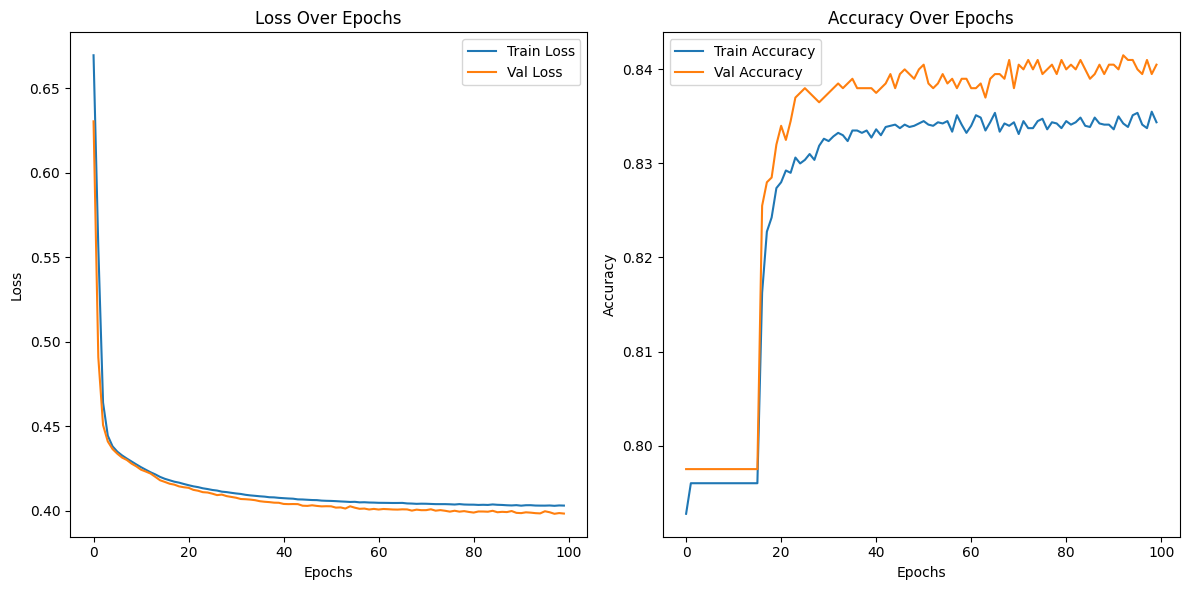

In [ ]:

# Step 10: Plot training history (loss and accuracy)
# Plot the training and validation loss over epochs
plt.figure(figsize=(12, 6))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


4. Predict the Test Set Results

In [ ]:
y_pred = classifier1.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [ ]:
y_pred

array([[0.2874634 ],
       [0.36989045],
       [0.20545961],
       ...,
       [0.13685775],
       [0.13953704],
       [0.22078344]], dtype=float32)

In [ ]:
y_pred = (y_pred > 0.5)
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

5. Make the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
print("\n")
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)
print("\n")

report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Confusion Matrix:
[[1559   36]
 [ 282  123]]


Accuracy Score: 0.841


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.98      0.91      1595
           1       0.77      0.30      0.44       405

    accuracy                           0.84      2000
   macro avg       0.81      0.64      0.67      2000
weighted avg       0.83      0.84      0.81      2000



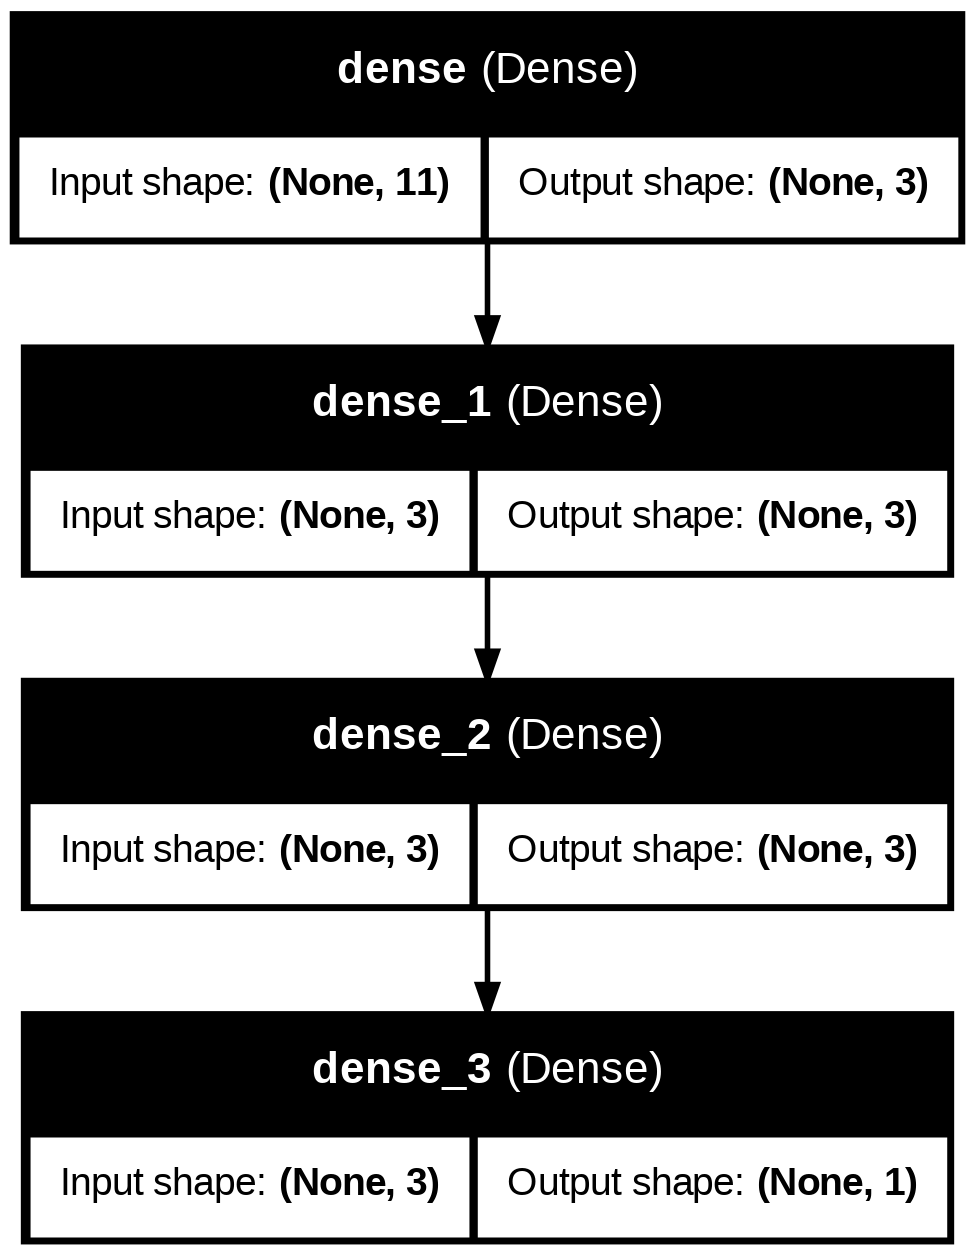

In [ ]:
from tensorflow import keras
from tensorflow.keras.utils import plot_model

# Generate the visualization of the model's architecture
plot_model(classifier1, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)

from IPython.display import Image
Image('model_architecture.png')
